In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

from matrixprofile import *

In [2]:
X_train_decimated_scaled_max = np.load("RavdessAudioOnlyNumpy__X_train_decimated_scaled_max.npy")
X_test_decimated_scaled_max = np.load("RavdessAudioOnlyNumpy__X_test_decimated_scaled_max.npy")
X_decimated_scaled_max = np.load("RavdessAudioOnlyNumpy__X_decimated_scaled_max.npy")
df_decimated_scaled_max=pd.DataFrame(X_decimated_scaled_max)

In [3]:
centroid1=np.load("kmeans_dtw_1st_centroid.npy")
centroid2=np.load("kmeans_dtw_2nd_centroid.npy")

In [4]:
centroid1.shape

(50,)

## Motifs

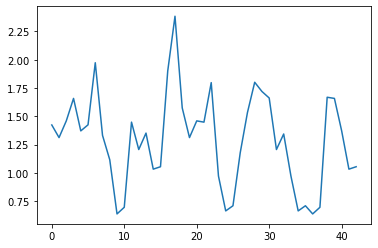

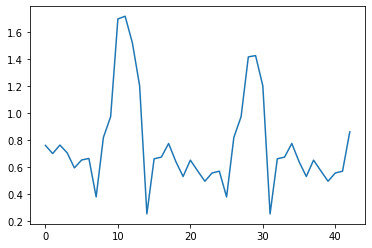

In [5]:
w=8
mp1, mpi1 = matrixProfile.stomp(centroid1, w)
plt.plot(mp1)
plt.show()

mp2, mpi2 = matrixProfile.stomp(centroid2, w)
plt.plot(mp2)
plt.show()

In [6]:
mo1, mod1  = motifs.motifs(centroid1, (mp1, mpi1), max_motifs=5)
print(mo1)

mo2, mod2  = motifs.motifs(centroid2, (mp2, mpi2), max_motifs=5)
print(mo2)

[[9, 36], [14, 31, 41], [1, 19, 26]]
[[14, 31], [7, 25], [1, 19, 36]]


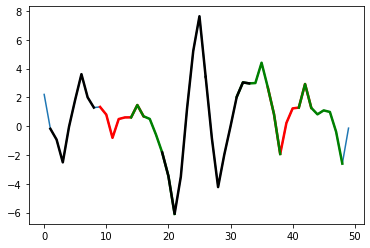

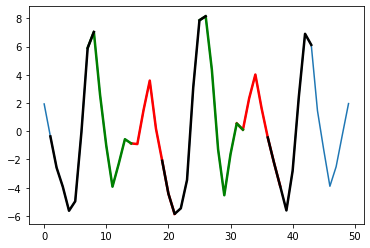

In [7]:
plt.plot(centroid1)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo1)]
for m, d, c in zip(mo1, mod1, colors):
    for i in m:
        m_shape = centroid1[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=2.5)
plt.show()

plt.plot(centroid2)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo2)]
for m, d, c in zip(mo2, mod2, colors):
    for i in m:
        m_shape = centroid2[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=2.5)
plt.show()

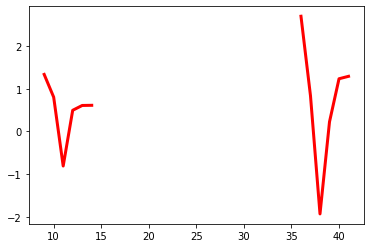

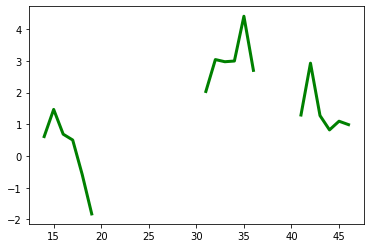

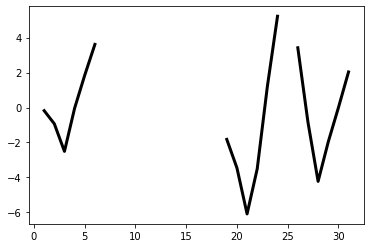

In [15]:
for m, d, c in zip(mo1, mod1, colors):
    for i in m:
        m_shape = centroid1[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

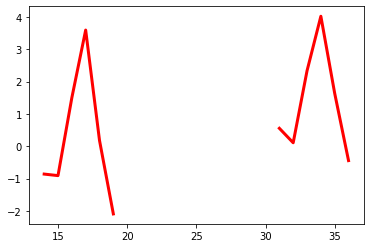

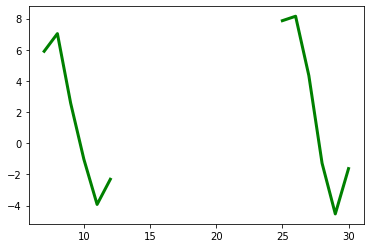

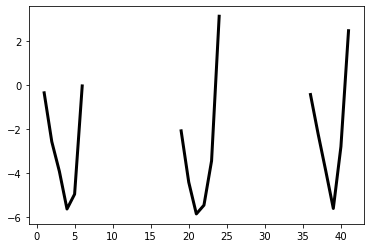

In [16]:
for m, d, c in zip(mo2, mod2, colors):
    for i in m:
        m_shape = centroid2[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

## Anomaly

In [8]:
from matrixprofile.discords import discords

In [9]:
w=6
mp1, mpi1 = matrixProfile.stomp(centroid1, w)

mp2, mpi2 = matrixProfile.stomp(centroid2, w)

In [10]:
anoms1 = discords(mp1, ex_zone=3, k=5)
print(anoms1)

anoms2 = discords(mp2, ex_zone=3, k=5)
print(anoms2)

[ 4 40 30 22  8]
[44 10 28 13  1]


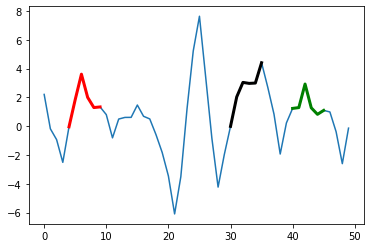

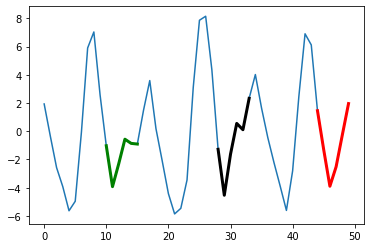

In [12]:
plt.plot(centroid1)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo1)]
for a, c in zip(anoms1, colors):
    a_shape = centroid1[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)
plt.show()

plt.plot(centroid2)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo2)]
for a, c in zip(anoms2, colors):
    a_shape = centroid2[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)
plt.show()